<CENTER>
<img src="https://secure.meetupstatic.com/photos/theme_head/d/9/1/7/full_7435575.jpeg" width="100%">

  <header>
    <h1>Python Data Science</h1>
    <h3>18 Octubre 2017</h3>
    <h2>@victormartin</h2>
    <p></p>
  </header>
</CENTER>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import os
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (16, 6)

import seaborn as sns

sns.set_context("notebook", font_scale=1.4)
sns.set_style("whitegrid")


# Contingut d'aquesta xerrada

- Data Science i Machine Learning
- Per què Python?
- Kaggle.com - Plataforma de competicions de data science
- Titanic - Getting Started competition


Per veure aquest notebook en format de presentació (Reveal.js):

```
$ipython nbconvert datascience_introduction.ipynb --to slides --post serve
```

# Què vol dir *data science*?

> *Anàlisis de dades aplicant mètodes científics per tal d'extraure coneixement*
>
> [Definició de Wikipedia](https://en.wikipedia.org/wiki/Data_science])


Del reconeixement de patrons ha evolucionat cap al *machine learning* -> algorismes d'aprenentatge

# Què vol dir *machine learning*?

> *Camp d'estudi que dona a les computadores la habilitat d'aprendre sense haber estat explícitament programades*
>
> Arthur Samuel - 1959

# Diferents tipus de algoritmes de aprenentatge

- [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning): Predir una dada desconeguda, a partir de dades d'entrenament (conegudes)
- [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
- [Reinforcement learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
- [Recommender systems](https://en.wikipedia.org/wiki/Recommender_system)

### Material recomanat:

- Curs [Introduction to Machine Learning](https://www.coursera.org/learn/machine-learning) de Andrew Ng a Coursera - Aquí **[un bon resum/apunts](http://www.holehouse.org/mlclass/)** pels més mandrosos ;)

# Exemple aprenentatge supervisat



### Predicció de preu de venda de pisos

In [64]:
dades = {
    u'Superfície (m2)': [50,70,100,130,200],
    u'Preu (€)': [50000,55000,190000,220000,300000],
}
df_training = pd.DataFrame(dades)
df_training

,Preu (€),Superfície (m2)
0,50000,50
1,55000,70
2,190000,100
3,220000,130
4,300000,200


** <small>Bon moment per recuperar els slides <a href="https://github.com/victormartingarcia/2017-pyGrn-intropandas" target="_blank">"Intro to Pandas"</a> :)</small>

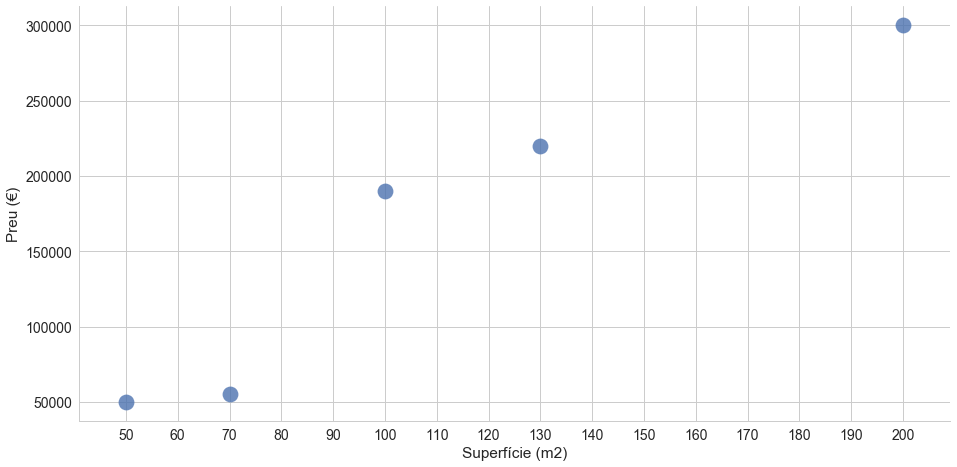

In [65]:
# Dibuixem les dades d'entrenament
sns.lmplot(x=u'Superfície (m2)',
           y=u'Preu (€)',
           data=df_training, # Data source
           fit_reg=False, # Don't fix a regression line
           size=6.8,
           aspect=2,
           scatter_kws={"s": 250}
).set(xticks=np.arange(50,201,10));

**Quant puc demanar per un pis de 90m2?**

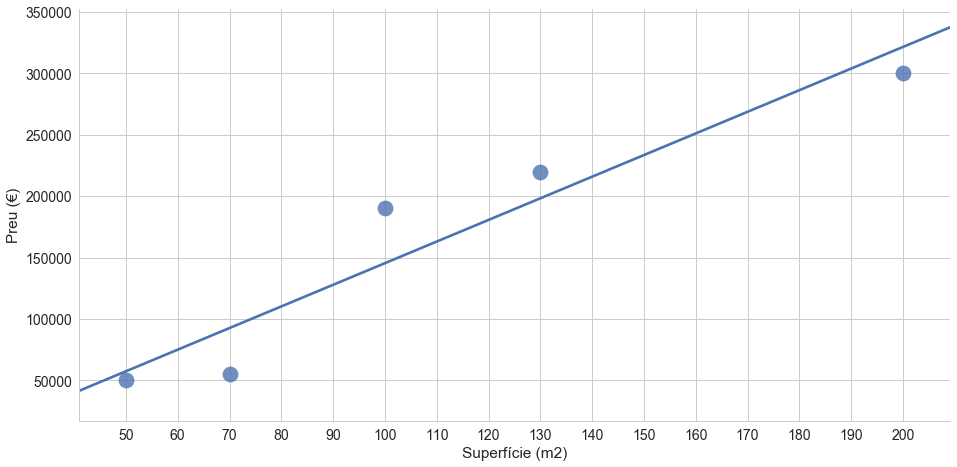

In [66]:
# Dibuixem les dades d'entrenament -> REGRESSIÓ LINEAL
sns.lmplot(x=u'Superfície (m2)',
           y=u'Preu (€)',
           data=df_training, # Data source
           fit_reg=True, # Fix a regression line
           ci=0,
           size=6.8,
           aspect=2,
           scatter_kws={"s": 250}
).set(xticks=np.arange(50,201,10));

**Segons aquest model, per un pis de 90m2 puc demanar 130 000€**

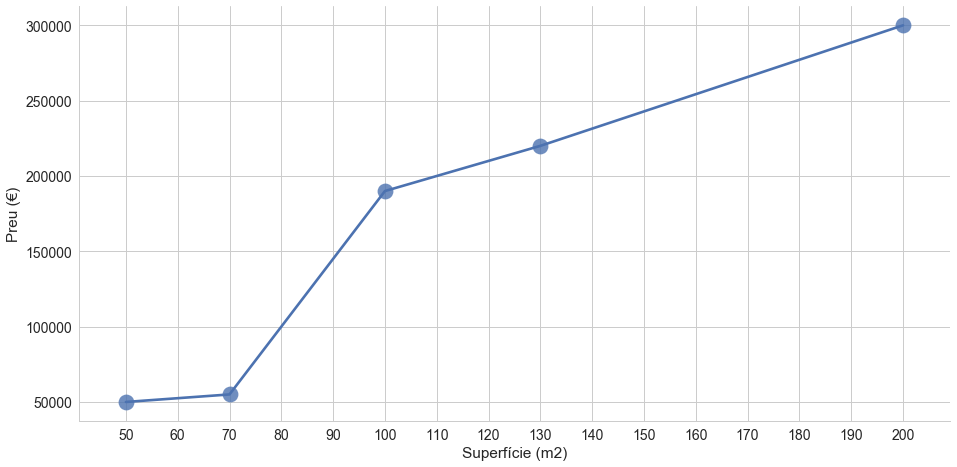

In [70]:
# Dibuixem les dades d'entrenament -> Un altre algorisme predictiu
sns.lmplot(x=u'Superfície (m2)',
           y=u'Preu (€)',
           data=df_training, # Data source
           lowess=True, # Fix a logistic line
           ci=0,
           size=6.8,
           aspect=2,
           scatter_kws={"s": 250}).set(xticks=np.arange(50,201,10));

**WTF!!** Segons aquest altre model, per un pis de 90m2 puc demanar 150 000€ ( 20k € més!). Quin és el bò?

# Objectiu: Crear un model que *generalitzi*

Per *generalització* entenem que el model s'ajusti a TOTES les dades Out-sample, no només a les dades in-sample del training set.

<center>
<img src="https://www.netquest.com/hubfs/Imported_Blog_Media/data.png" width="60%"/>
<p align="center">Funció sin(2πx)</p>
</center>

# Underfitting i Overfitting
<center>
<img src="https://www.netquest.com/hubfs/Imported_Blog_Media/4modelos1.png" width="100%"/>
<p align="center">M = Ordre del polinomi</p>
</center>

# "La prueba del algodón": Cross-Validation

Per saber si un model generalitza, s'ha de probar amb dades noves (out-of-sample). 

**Cross-Validation**: 

1. Separar el dataset en 2 conjunts (p.ex. 70%/30% de les dades)
1. Entrenarem el nostre model amb el primer conjunt (**training set**)
1. Aplicarem el model al segon conjunt (**validation set**)
1. Mesurarem el *performance* del nostre model amb qualsevol [métrica d'evaluació](http://scikit-learn.org/stable/modules/model_evaluation.html)



<center>
<img src="https://www.netquest.com/hubfs/Imported_Blog_Media/errorvsm.png" width="70%"/>
</center>

# Training de models

Gran part del machine learning es basa en el [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent): Algorisme de minimització d'una funció de manera iterativa


<center>
<img src="https://alykhantejani.github.io/images/gradient_descent_line_graph.gif" width="100%"/>
</center>

# Algoritmes d'aprenentatge supervisat

- Linear Regression
- Polynomial Regression
- Decision Trees
- Supported Vector Machines
- Neural Networks

> When in doubt, use [Random Forest](https://en.wikipedia.org/wiki/Random_forest) — the go-to machine learning algorithm that is considered to be one of the most effective and versatile in solving almost any prediction task
>
> Rebecca Merrett, TechWorld Australia

Veure [visualització/exemple de arbres de decisió](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

# Worflow per afrontar un problema de machine learning

1. Obtención de dades (training set)
2. *Feature Engineering*
3. Entrenar model
4. Cross Validation / Evaulació

## Mega-links sobre aplicació pràctica de ML:


- [Advice for applying Machine Learning](http://www.holehouse.org/mlclass/10_Advice_for_applying_machine_learning.html): Apunts del curs Introduction de Machine Learning de Coursera
- [Machine Learning Systems Design](http://www.holehouse.org/mlclass/11_Machine_Learning_System_Design.html): Apunts del curs Introduction de Machine Learning de Coursera
- [Best Practices for ML Engineering](http://martin.zinkevich.org/rules_of_ml/rules_of_ml.pdf): Escrit per un enginyer de Google (PDF)



In [76]:
# Work in Progress!

## Gràcies per escoltar! Preguntes?


- https://github.com/victormartingarcia
- <mailto:victor.martin.garcia@gmail.com>
- [@victormartin](https://twitter.com/victormartin)


Slides and data: Source: (TODO: Link github)

Slides presented with 'live reveal' https://github.com/damianavila/RISE
